In [6]:
import os
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../Data/Clean/final_project_data_merge_clean.csv", parse_dates=["Fecha Fin Transaccion"], dayfirst=True, encoding='unicode_escape') 

/var/folders/pr/_2b__hxx28x47_ngnblr_zpc0000gp/T/ipykernel_12432/1439419049.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/Clean/final_project_data_merge_clean.csv", parse_dates=["Fecha Fin Transaccion"], dayfirst=True, encoding='unicode_escape')


In [8]:
df

,Nombre Local,ID Factura,Fecha Fin Transaccion,Codigo Interno del Producto,Codigo producto,Descripcion del Producto,Categoria 1,Categoria 2,Subtotal,Descuentos,Impuestos,Total,Unidades Vendidas,Precio,Week_Number,Month,Year
0,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,3232,casacasco02-845854d65a4841e5_3232_ab36d2473dbd...,Dorado al Coco,Comida,Principales,26.00,0.0,1.82,27.82,1,26.00,31,8,2024
1,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,780,casacasco02-845854d65a4841e5_780_e6aed2a7b2f26f98,Coconut Passion,Bebidas Alcoholicas,HOUSE COCKTAILS,13.50,0.0,0.95,14.45,1,13.50,31,8,2024
2,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,694,casacasco02-845854d65a4841e5_694_d99dd7663179a996,Lavazza Cafe,Bebidas No Alcoholicas,CAFE,5.00,0.0,0.35,5.35,1,5.00,31,8,2024
3,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,510,casacasco01-5d78e012c5714e63_510_3557ca1abc96af50,Hamburguesa Marula,Comida,Principales,19.00,0.0,1.33,20.33,1,19.00,31,8,2024
4,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,1738,casacasco01-5d78e012c5714e63_1738_e1915d2f782f...,Pizza de Prosciutto,Comida,Principales,18.00,0.0,1.26,19.26,1,18.00,31,8,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89670,Restaurant 2,20240930_83902_VAAG,2024-09-30 22:14:00,182,elfaro02-58c61a7f6a474ee2_182_1c8993868b83fef4,Mini Hamburguesas,Comida,Entrantes,10.00,0.0,0.70,10.70,1,10.00,40,9,2024
89671,Restaurant 2,20240930_83902_VAAG,2024-09-30 22:14:00,10120005,elfaro02-58c61a7f6a474ee2_10120005_8ee2d04f187...,SandBanks,BEBIDAS ALCOHOLICAS,MOJITOS,9.00,0.0,0.63,9.63,1,9.00,40,9,2024
89672,Restaurant 2,20240930_83900_VAAG,2024-09-30 22:35:00,674,elfaro02-58c61a7f6a474ee2_674_5f49cbf22ed9b09d,Red Sea (Frutos del Bosque),Bebidas No Alcoholicas,MOCKTAILS,6.50,0.0,0.46,6.96,1,6.50,40,9,2024
89673,Restaurant 2,20240930_83903_VAAG,2024-09-30 23:05:00,1026,elfaro02-58c61a7f6a474ee2_1026_9ec20b79a5b3f170,Mar de Leva,BEBIDAS ALCOHOLICAS,COCTELES AUTOR,13.00,0.0,0.91,13.91,1,13.00,40,9,2024


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89675 entries, 0 to 89674
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nombre Local                 89675 non-null  object 
 1   ID Factura                   89675 non-null  object 
 2   Fecha Fin Transaccion        89675 non-null  object 
 3   Codigo Interno del Producto  89675 non-null  object 
 4   Codigo producto              89675 non-null  object 
 5   Descripcion del Producto     89675 non-null  object 
 6   Categoria 1                  89675 non-null  object 
 7   Categoria 2                  89675 non-null  object 
 8   Subtotal                     89675 non-null  float64
 9   Descuentos                   89675 non-null  float64
 10  Impuestos                    89675 non-null  float64
 11  Total                        89675 non-null  float64
 12  Unidades Vendidas            89675 non-null  int64  
 13  Precio          

In [10]:
df.rename(columns={'ï»¿Nombre Local': 'Nombre Local'}, inplace=True)
df

,Nombre Local,ID Factura,Fecha Fin Transaccion,Codigo Interno del Producto,Codigo producto,Descripcion del Producto,Categoria 1,Categoria 2,Subtotal,Descuentos,Impuestos,Total,Unidades Vendidas,Precio,Week_Number,Month,Year
0,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,3232,casacasco02-845854d65a4841e5_3232_ab36d2473dbd...,Dorado al Coco,Comida,Principales,26.00,0.0,1.82,27.82,1,26.00,31,8,2024
1,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,780,casacasco02-845854d65a4841e5_780_e6aed2a7b2f26f98,Coconut Passion,Bebidas Alcoholicas,HOUSE COCKTAILS,13.50,0.0,0.95,14.45,1,13.50,31,8,2024
2,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,694,casacasco02-845854d65a4841e5_694_d99dd7663179a996,Lavazza Cafe,Bebidas No Alcoholicas,CAFE,5.00,0.0,0.35,5.35,1,5.00,31,8,2024
3,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,510,casacasco01-5d78e012c5714e63_510_3557ca1abc96af50,Hamburguesa Marula,Comida,Principales,19.00,0.0,1.33,20.33,1,19.00,31,8,2024
4,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,1738,casacasco01-5d78e012c5714e63_1738_e1915d2f782f...,Pizza de Prosciutto,Comida,Principales,18.00,0.0,1.26,19.26,1,18.00,31,8,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89670,Restaurant 2,20240930_83902_VAAG,2024-09-30 22:14:00,182,elfaro02-58c61a7f6a474ee2_182_1c8993868b83fef4,Mini Hamburguesas,Comida,Entrantes,10.00,0.0,0.70,10.70,1,10.00,40,9,2024
89671,Restaurant 2,20240930_83902_VAAG,2024-09-30 22:14:00,10120005,elfaro02-58c61a7f6a474ee2_10120005_8ee2d04f187...,SandBanks,BEBIDAS ALCOHOLICAS,MOJITOS,9.00,0.0,0.63,9.63,1,9.00,40,9,2024
89672,Restaurant 2,20240930_83900_VAAG,2024-09-30 22:35:00,674,elfaro02-58c61a7f6a474ee2_674_5f49cbf22ed9b09d,Red Sea (Frutos del Bosque),Bebidas No Alcoholicas,MOCKTAILS,6.50,0.0,0.46,6.96,1,6.50,40,9,2024
89673,Restaurant 2,20240930_83903_VAAG,2024-09-30 23:05:00,1026,elfaro02-58c61a7f6a474ee2_1026_9ec20b79a5b3f170,Mar de Leva,BEBIDAS ALCOHOLICAS,COCTELES AUTOR,13.00,0.0,0.91,13.91,1,13.00,40,9,2024


### Proyección Ventas Restaurante 1

In [12]:
df_Rest1 = df.loc[lambda df: df['Nombre Local'] == 'Restaurant 1']
df_Rest1

,Nombre Local,ID Factura,Fecha Fin Transaccion,Codigo Interno del Producto,Codigo producto,Descripcion del Producto,Categoria 1,Categoria 2,Subtotal,Descuentos,Impuestos,Total,Unidades Vendidas,Precio,Week_Number,Month,Year
3,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,510,casacasco01-5d78e012c5714e63_510_3557ca1abc96af50,Hamburguesa Marula,Comida,Principales,19.0,0.0,1.33,20.33,1,19.0,31,8,2024
4,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,1738,casacasco01-5d78e012c5714e63_1738_e1915d2f782f...,Pizza de Prosciutto,Comida,Principales,18.0,0.0,1.26,19.26,1,18.0,31,8,2024
5,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,1737,casacasco01-5d78e012c5714e63_1737_abbbddee1462...,Buffalo Wings,Comida,Principales,17.0,0.0,1.19,18.19,1,17.0,31,8,2024
6,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,1560,casacasco01-5d78e012c5714e63_1560_40c45b753bb3...,Nigiri 3 Tiempos,Comida,Principales,15.0,0.0,1.05,16.05,1,15.0,31,8,2024
7,Restaurant 1,20240801_283560_V10G,2024-08-01 13:00:00,2393,casacasco01-5d78e012c5714e63_2393_c70cbbfbfd78...,Postre Kaboso Nikkei,Comida,Postres,15.0,0.0,1.05,16.05,1,15.0,31,8,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86201,Restaurant 1,20240930_291249_V10G,2024-09-30 22:49:00,11000015,casacasco01-5d78e012c5714e63_11000015_1df5bd2f...,Balboa Roja lata 330 ml,Bebidas Alcoholicas,CERVEZA,10.0,0.0,0.70,10.70,2,5.0,40,9,2024
86202,Restaurant 1,20240930_291249_V10G,2024-09-30 22:49:00,1784,casacasco01-5d78e012c5714e63_1784_f4fc56e734f6...,Jim Beam Trago,Bebidas Alcoholicas,BOURBON,10.0,0.0,0.70,10.70,1,10.0,40,9,2024
86203,Restaurant 1,20240930_291249_V10G,2024-09-30 22:49:00,650,casacasco01-5d78e012c5714e63_650_b90621ce4caf754a,Beefeater GinTrago,Bebidas Alcoholicas,GINEBRA,9.5,0.0,0.66,10.16,1,9.5,40,9,2024
86204,Restaurant 1,20240930_291249_V10G,2024-09-30 22:49:00,1046,casacasco01-5d78e012c5714e63_1046_94854b99449a...,Dona Paula Cardos Malbec Copa,Bebidas Alcoholicas,VINO TINTO,8.0,0.0,0.56,8.56,1,8.0,40,9,2024


In [13]:
Rest1_revenue = pd.pivot_table(df_Rest1, index=["Fecha Fin Transaccion"], aggfunc={'Total': np.sum})
Rest1_revenue.reset_index(inplace = True)
Rest1_revenue

/var/folders/pr/_2b__hxx28x47_ngnblr_zpc0000gp/T/ipykernel_12432/1145718987.py:1: FutureWarning: The provided callable <function sum at 0x10c9644a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Rest1_revenue = pd.pivot_table(df_Rest1, index=["Fecha Fin Transaccion"], aggfunc={'Total': np.sum})


,Fecha Fin Transaccion,Total
0,2024-06-01 13:15:00,100.05
1,2024-06-01 16:11:00,77.59
2,2024-06-01 16:25:00,128.40
3,2024-06-01 17:08:00,284.10
4,2024-06-01 17:10:00,25.15
...,...,...
17837,2024-11-28 0:20:00,2.68
17838,2024-11-28 0:24:00,14.23
17839,2024-11-28 0:29:00,2.68
17840,2024-11-28 0:31:00,17.12


In [14]:
Rest1_revenue.rename(columns = {'Total':'y',
                    'Fecha Fin Transaccion': 'ds',
                     }, inplace = True)
Rest1_revenue

,ds,y
0,2024-06-01 13:15:00,100.05
1,2024-06-01 16:11:00,77.59
2,2024-06-01 16:25:00,128.40
3,2024-06-01 17:08:00,284.10
4,2024-06-01 17:10:00,25.15
...,...,...
17837,2024-11-28 0:20:00,2.68
17838,2024-11-28 0:24:00,14.23
17839,2024-11-28 0:29:00,2.68
17840,2024-11-28 0:31:00,17.12


18:49:20 - cmdstanpy - INFO - Chain [1] start processing
18:49:23 - cmdstanpy - INFO - Chain [1] done processing


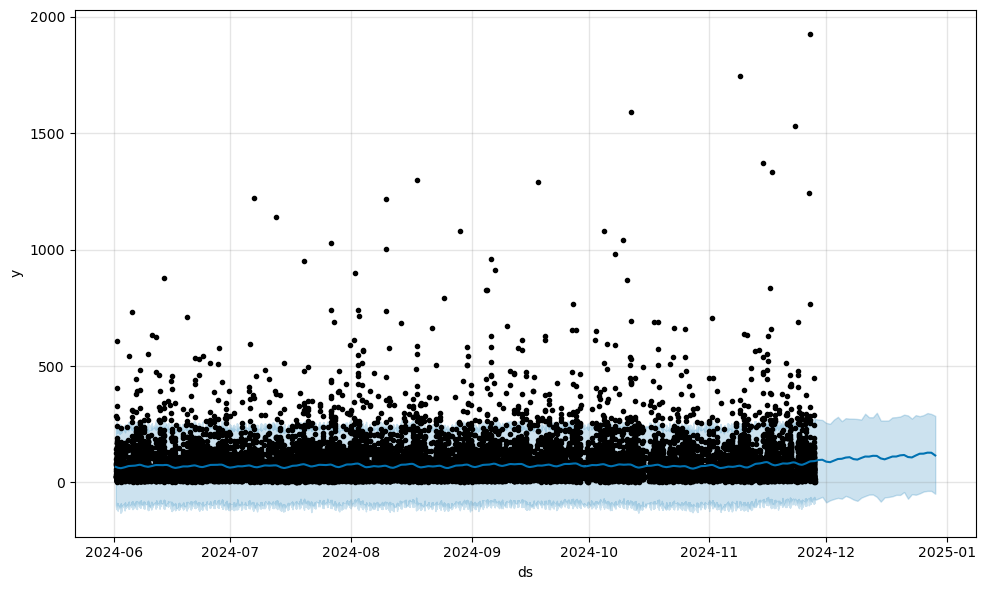

In [15]:
m = Prophet(mcmc_samples = 0, interval_width=0.95, seasonality_mode='multiplicative')
m.add_seasonality('daily', period=91.25, fourier_order=8, mode='additive')
m.fit(Rest1_revenue)
future = m.make_future_dataframe(periods = 31, freq = 'D')
forecast = m.predict(future)
fig = m.plot(forecast)

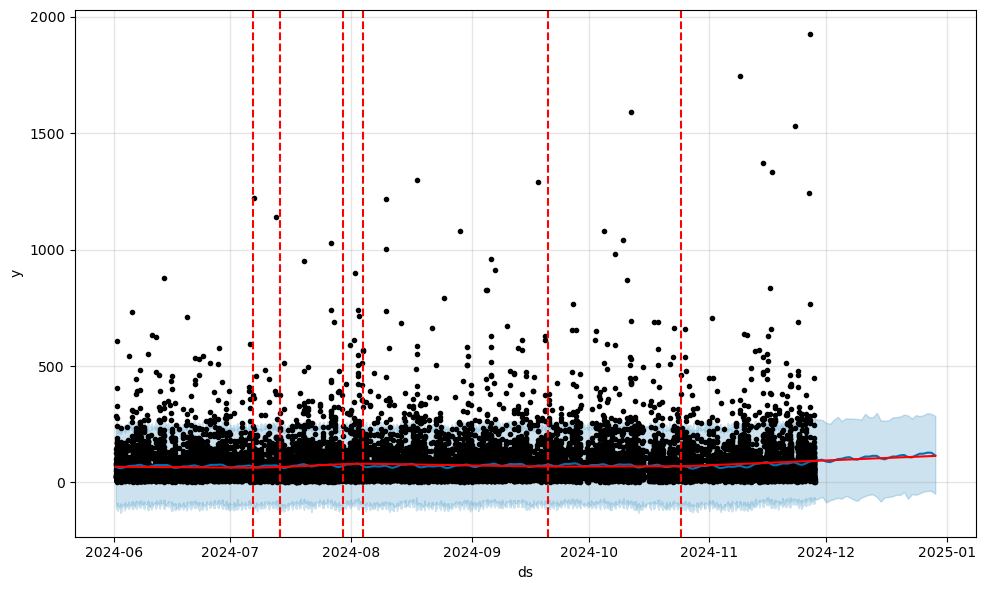

In [16]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#Los puntos negros representan las ventas.
#Las líneas rojas verticales, muestran el cambio de tendencia, cuando bajan o suben las ventas.
#La linea roja horizontal, muestra la tendencia global de la predicción. Al final sube por lo que demuestra que la tendencia es positiva, las ventas van a subir. 

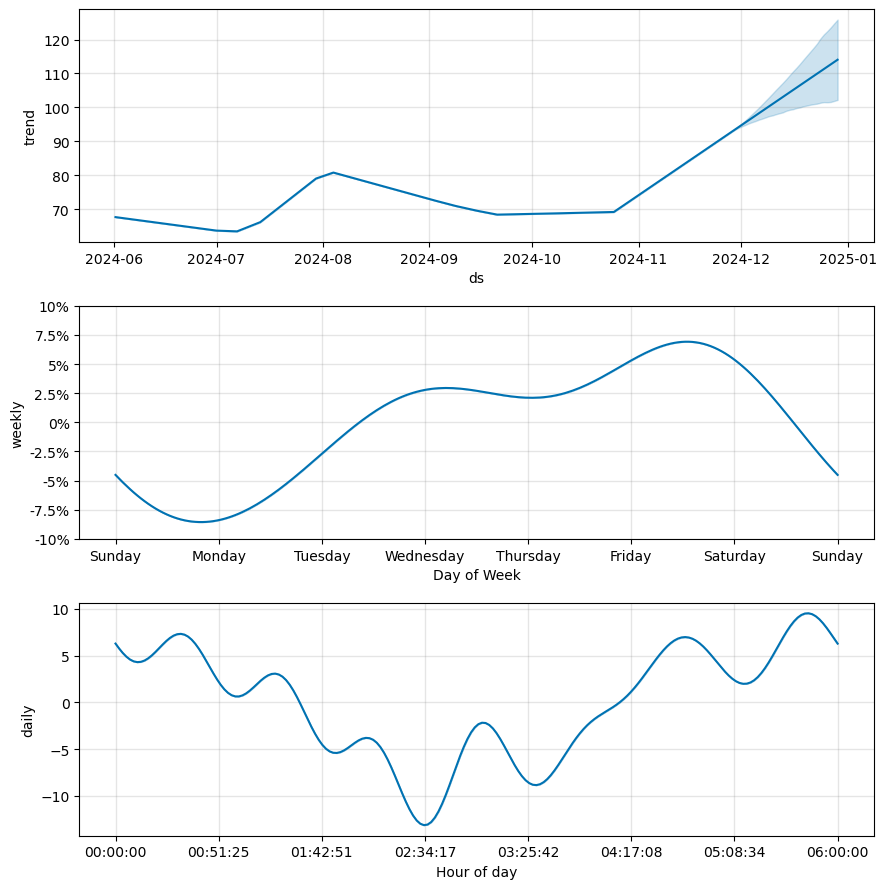

In [17]:
fig2 = m.plot_components(forecast)
#Gráficas Restaurante1: Tendencia proyección de ventas
#Gráfico 1: Tendencia de ventas por mes
#Gráfico 2: Tendencia de ventas por día de la semana
#Gráfico 3: Tendencia de ventas por horas del día

### Proyecciones Ventas Restaurante 2

In [19]:
df_Rest2 = df.loc[lambda df: df['Nombre Local'] == 'Restaurant 2']

df_Rest2

,Nombre Local,ID Factura,Fecha Fin Transaccion,Codigo Interno del Producto,Codigo producto,Descripcion del Producto,Categoria 1,Categoria 2,Subtotal,Descuentos,Impuestos,Total,Unidades Vendidas,Precio,Week_Number,Month,Year
0,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,3232,casacasco02-845854d65a4841e5_3232_ab36d2473dbd...,Dorado al Coco,Comida,Principales,26.00,0.0,1.82,27.82,1,26.00,31,8,2024
1,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,780,casacasco02-845854d65a4841e5_780_e6aed2a7b2f26f98,Coconut Passion,Bebidas Alcoholicas,HOUSE COCKTAILS,13.50,0.0,0.95,14.45,1,13.50,31,8,2024
2,Restaurant 2,20240801_102403_V11G,2024-08-01 12:42:00,694,casacasco02-845854d65a4841e5_694_d99dd7663179a996,Lavazza Cafe,Bebidas No Alcoholicas,CAFE,5.00,0.0,0.35,5.35,1,5.00,31,8,2024
12,Restaurant 2,20240801_102399_V11G,2024-08-01 13:21:00,11000015,casacasco02-845854d65a4841e5_11000015_1df5bd2f...,Balboa Roja lata 330 ml,Bebidas Alcoholicas,CERVEZA,5.00,0.0,0.35,5.35,1,5.00,31,8,2024
13,Restaurant 2,20240801_102400_V11G,2024-08-01 13:49:00,994,casacasco02-845854d65a4841e5_994_c6e7dbc187fc6d7a,Wild Mojito,Bebidas Alcoholicas,HOUSE COCKTAILS,13.50,0.0,0.95,14.45,1,13.50,31,8,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89670,Restaurant 2,20240930_83902_VAAG,2024-09-30 22:14:00,182,elfaro02-58c61a7f6a474ee2_182_1c8993868b83fef4,Mini Hamburguesas,Comida,Entrantes,10.00,0.0,0.70,10.70,1,10.00,40,9,2024
89671,Restaurant 2,20240930_83902_VAAG,2024-09-30 22:14:00,10120005,elfaro02-58c61a7f6a474ee2_10120005_8ee2d04f187...,SandBanks,BEBIDAS ALCOHOLICAS,MOJITOS,9.00,0.0,0.63,9.63,1,9.00,40,9,2024
89672,Restaurant 2,20240930_83900_VAAG,2024-09-30 22:35:00,674,elfaro02-58c61a7f6a474ee2_674_5f49cbf22ed9b09d,Red Sea (Frutos del Bosque),Bebidas No Alcoholicas,MOCKTAILS,6.50,0.0,0.46,6.96,1,6.50,40,9,2024
89673,Restaurant 2,20240930_83903_VAAG,2024-09-30 23:05:00,1026,elfaro02-58c61a7f6a474ee2_1026_9ec20b79a5b3f170,Mar de Leva,BEBIDAS ALCOHOLICAS,COCTELES AUTOR,13.00,0.0,0.91,13.91,1,13.00,40,9,2024


In [20]:
Rest2_revenue = pd.pivot_table(df_Rest2, index=["Fecha Fin Transaccion"], aggfunc={'Total': np.sum})
Rest2_revenue.reset_index(inplace = True)
Rest2_revenue

/var/folders/pr/_2b__hxx28x47_ngnblr_zpc0000gp/T/ipykernel_12432/3507720504.py:1: FutureWarning: The provided callable <function sum at 0x10c9644a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Rest2_revenue = pd.pivot_table(df_Rest2, index=["Fecha Fin Transaccion"], aggfunc={'Total': np.sum})


,Fecha Fin Transaccion,Total
0,2024-06-01 17:34:00,38.64
1,2024-06-01 17:36:00,54.04
2,2024-06-01 17:42:00,25.68
3,2024-06-01 17:50:00,47.35
4,2024-06-01 18:13:00,90.95
...,...,...
5838,2024-11-27 22:47:00,51.36
5839,2024-11-27 22:54:00,59.12
5840,2024-11-27 23:21:00,19.26
5841,2024-11-27 23:33:00,16.59


In [21]:
Rest2_revenue.rename(columns = {'Total':'y',
                    'Fecha Fin Transaccion': 'ds',
                     }, inplace = True)
Rest2_revenue
#Rename columns from "Fecha fin Transaccion" to "ds and "Total" to "y"
#Es necesario hacer este paso porque la librería prophet require que se llamen de esta manera.

,ds,y
0,2024-06-01 17:34:00,38.64
1,2024-06-01 17:36:00,54.04
2,2024-06-01 17:42:00,25.68
3,2024-06-01 17:50:00,47.35
4,2024-06-01 18:13:00,90.95
...,...,...
5838,2024-11-27 22:47:00,51.36
5839,2024-11-27 22:54:00,59.12
5840,2024-11-27 23:21:00,19.26
5841,2024-11-27 23:33:00,16.59


18:49:28 - cmdstanpy - INFO - Chain [1] start processing
18:49:29 - cmdstanpy - INFO - Chain [1] done processing


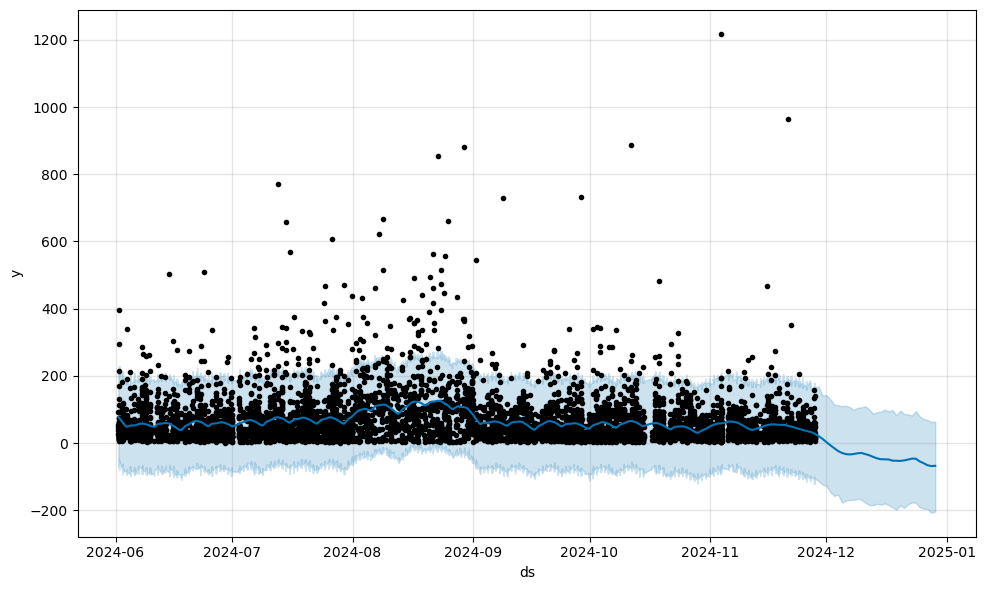

In [22]:
m = Prophet(mcmc_samples = 0, interval_width=0.95, seasonality_mode='multiplicative')
m.add_seasonality('daily', period=91.25, fourier_order=8, mode='additive')
m.fit(Rest2_revenue)
future = m.make_future_dataframe(periods = 31, freq = 'D')
forecast = m.predict(future)
fig = m.plot(forecast)

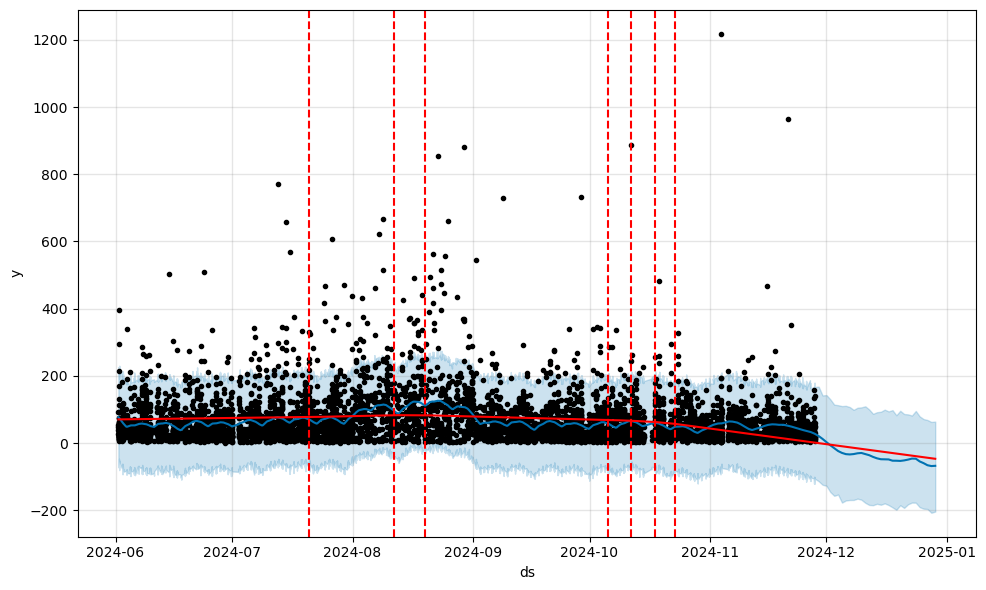

In [23]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

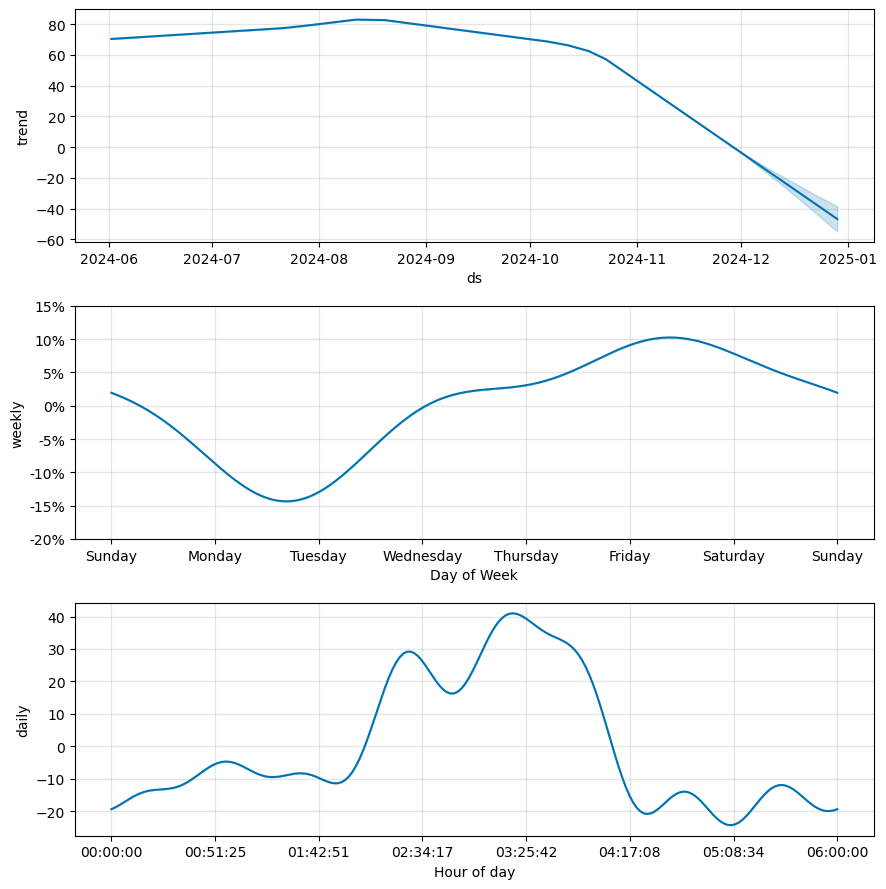

In [24]:
fig2 = m.plot_components(forecast)